In [6]:
import numpy as np
import matplotlib.pyplot as plt
from structural_properties.fits2ds import load_parts


In [ ]:
params = {'legend.fontsize': 7,
          'legend.handlelength': 2}
mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['font.family'] = 'serif'
plt.rcParams.update(params)

In [6]:
sims = ['m4s7', 'm3s85', 'm25s9', 'm35s9', 'm35s7', 'm25s85', 'm2s8', 'm4s8', 'm2s9', 'm3s8_50', 'm3s8', 'm35s75', 'm4s9', 'm3s9', 'm25s75', 'm2s1', 'm3s7', 'm3s75', 'm2s7', 'm25s8', 'm35s8', 'm3s8b', 'm35s85']

### Get the density profile and save it

In [13]:
sim = 'm35s85'
folder = '/home/ayuba/scratch/{}/'.format(sim)
snap = 'snapdir_{:03}/snapshot_{:03}'.format(snp, snp)
head     = readgadget.header(folder+snap)
BoxSize  = head.boxsize  #Mpc/h
Nall     = head.nall         #Total number of particles 
Masses   = head.massarr*1e10 #Masses of the particles in Msun/h 
mpart = Masses[1]
#compute mean density from snapshot                                 
mean_background = Nall[1]/BoxSize**3
print(mean_background)


with open(folder+sim+'_prefixes.txt', 'r') as file:
    prefixes = file.read().splitlines()
pdhalos = pd.read_table(folder+'AHF/halos/{}.AHF_halos'.format(prefixes[118-snp]), delim_whitespace=True, header=0)

print('HALO POSITIONS')

mfof = np.array(pdhalos['Mhalo(4)'])
halo_inf = np.load(fbase+sim+'/parts_near_hals_{}_snap{}.npy'.format(sim, 118-snapshot), allow_pickle=True)

snbins = [200, 300]
for nbins in snbins:
    data = []
    for i in range(len(halo_inf)):
        if pdhalos['Mhalo(4)'].loc[i]>1e13:
            vels, poses, halo_c, vel_h, rvir, mvir, rads3d, rads2d = load_parts(halo_inf, pdhalos, i, 10)
            redbins = np.logspace(np.log10(0.01*rvir), np.log10(10*rvir), nbins)
            
            binvolume = 4*np.pi*redbins[1:]*redbins[:-1]*(redbins[1:] - redbins[:-1]) #Mpc**3
            hist, rbins = np.histogram(rads3d, bins=redbins)
            rho_d = mpart*hist/binvolume
            rads = np.sqrt(redbins[1:]*redbins[:-1])
            data.append([mvir, rvir, rads, rho_d, hist])
    np.save('/home/ayuba/projects/def-taylor/newdprofiles_nbins{}_{}.npy'.format(nbins, sim), np.array(data, dtype=object))
del pdhalos, mfof, halo_inf

8.589934592
HALO POSITIONS


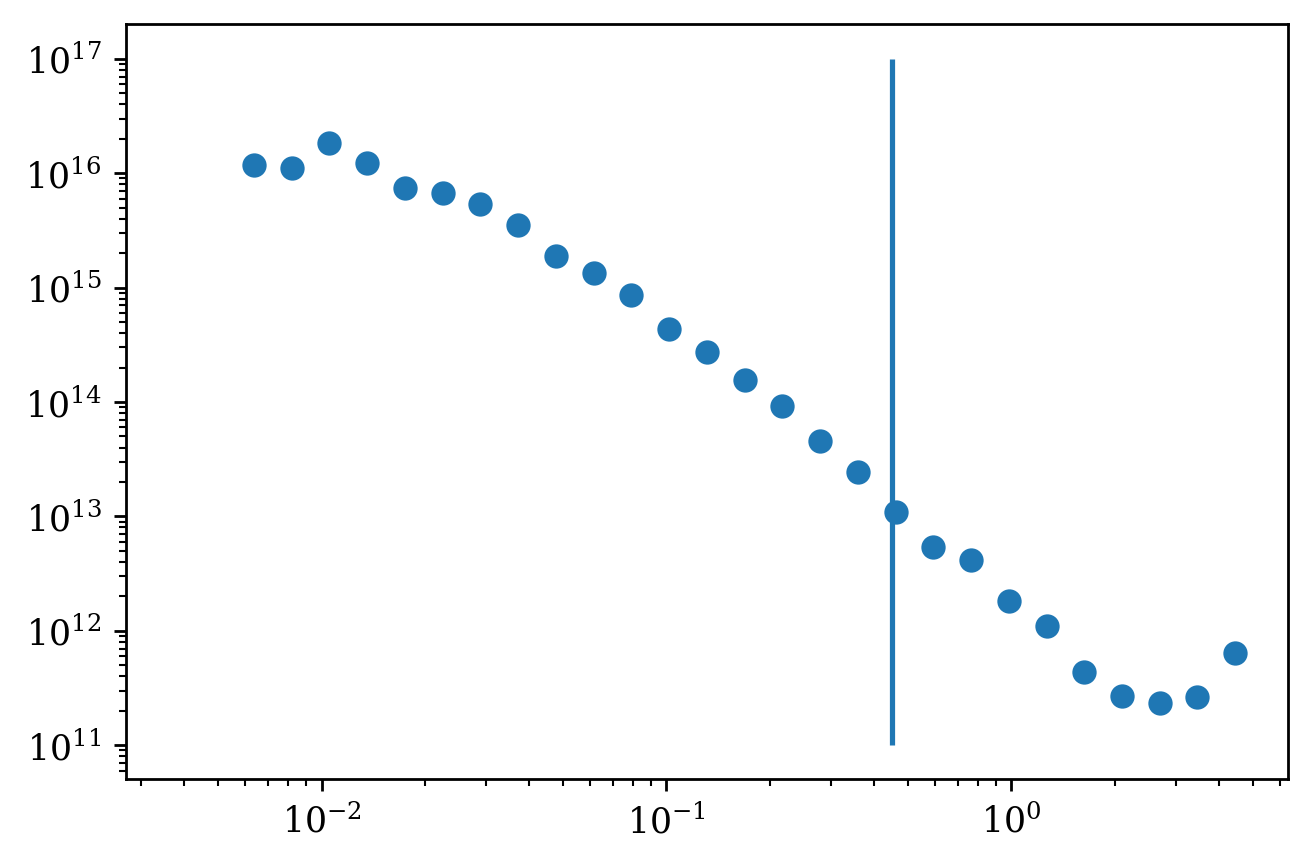

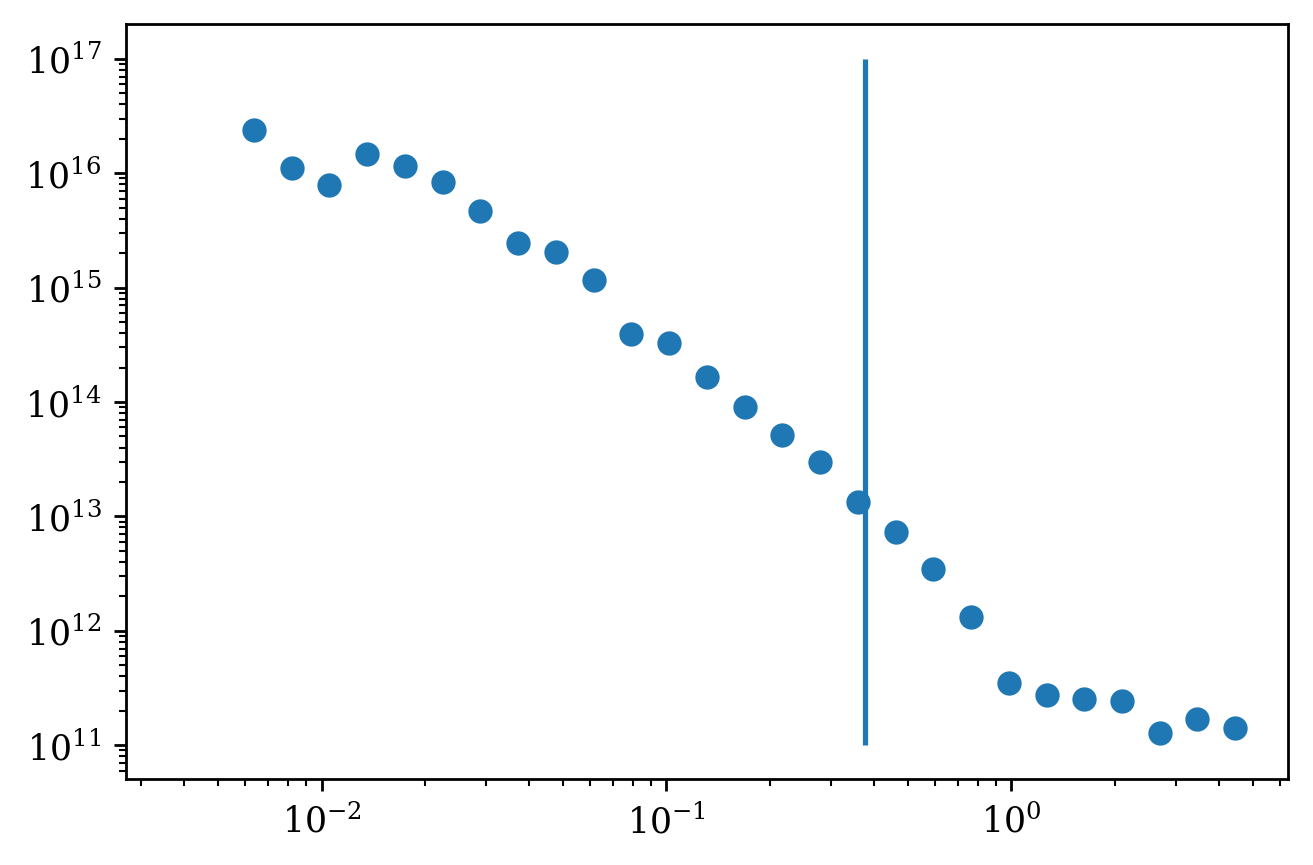

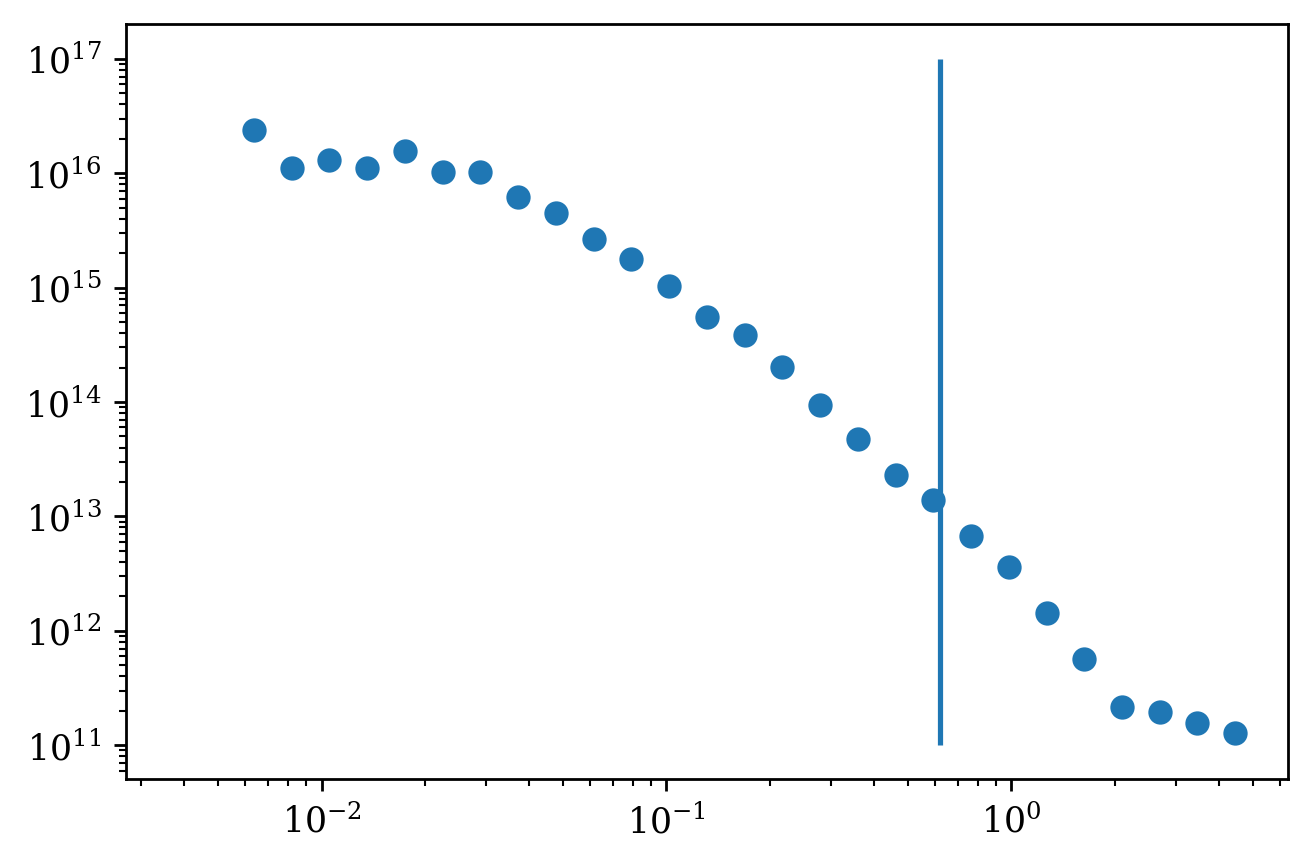

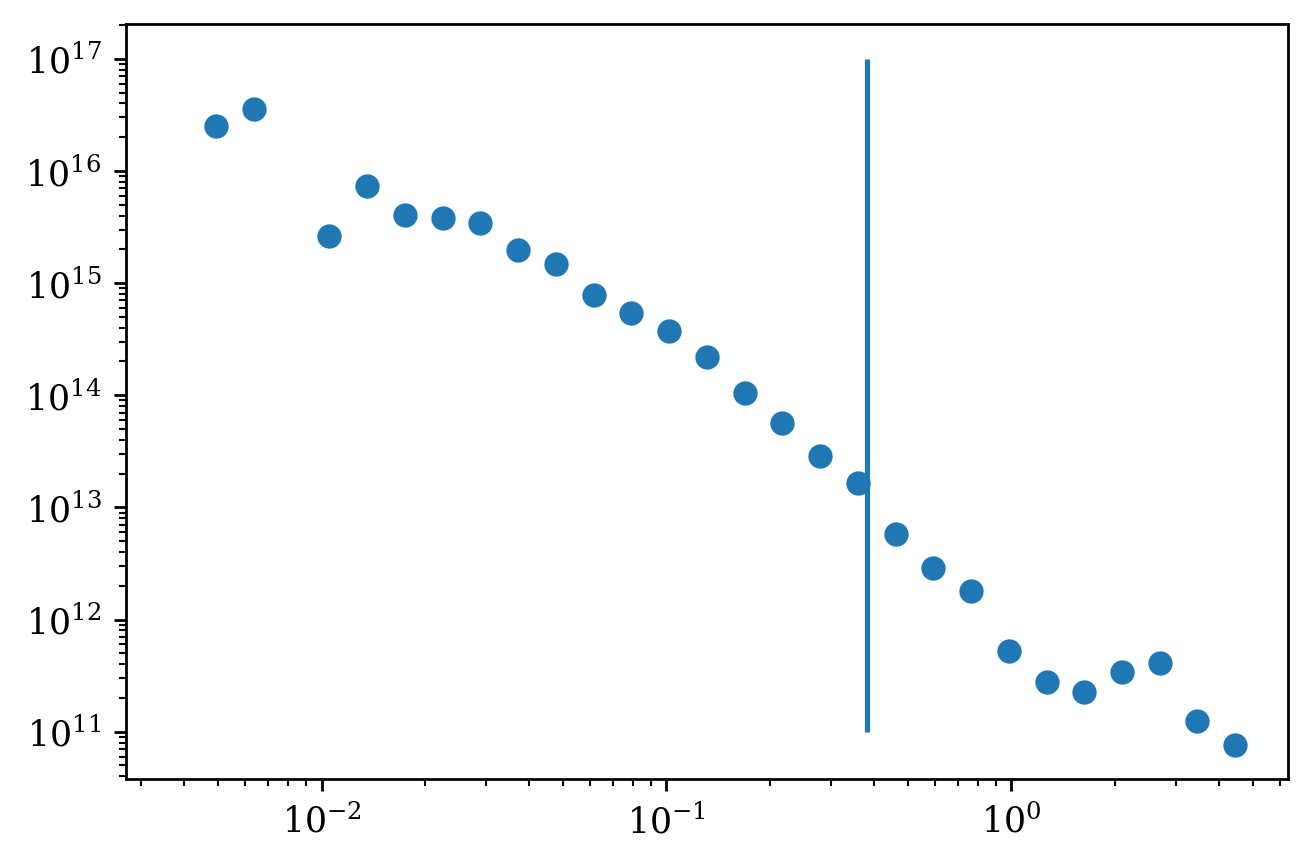

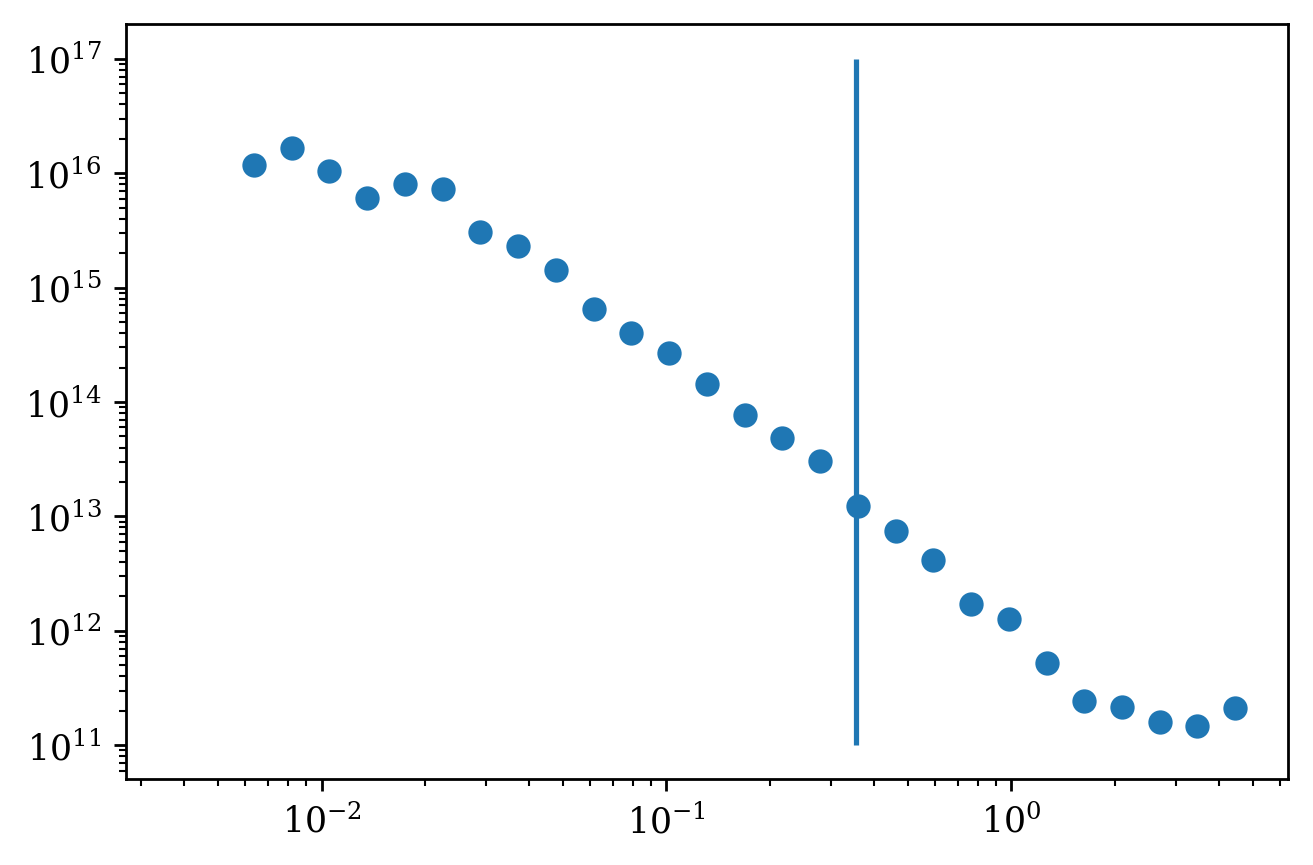

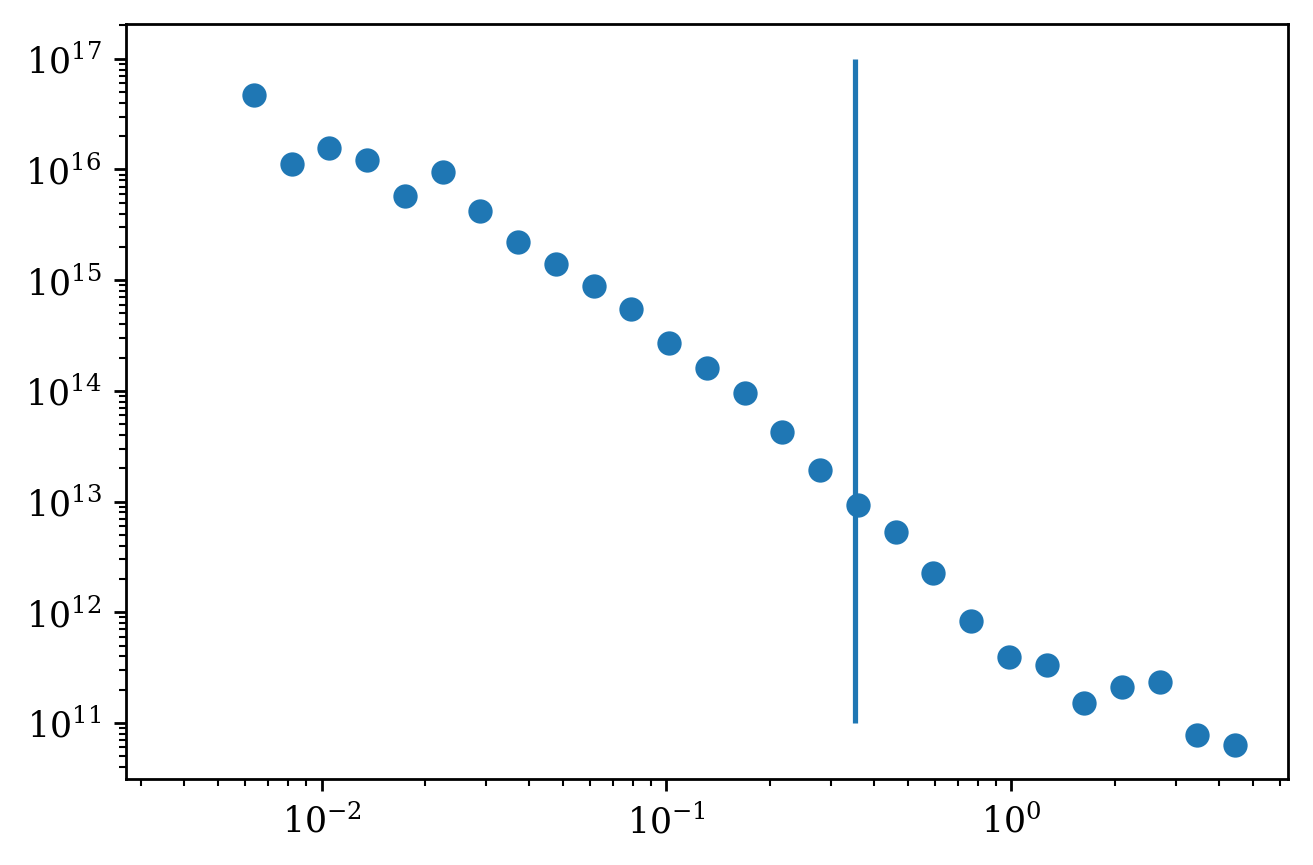

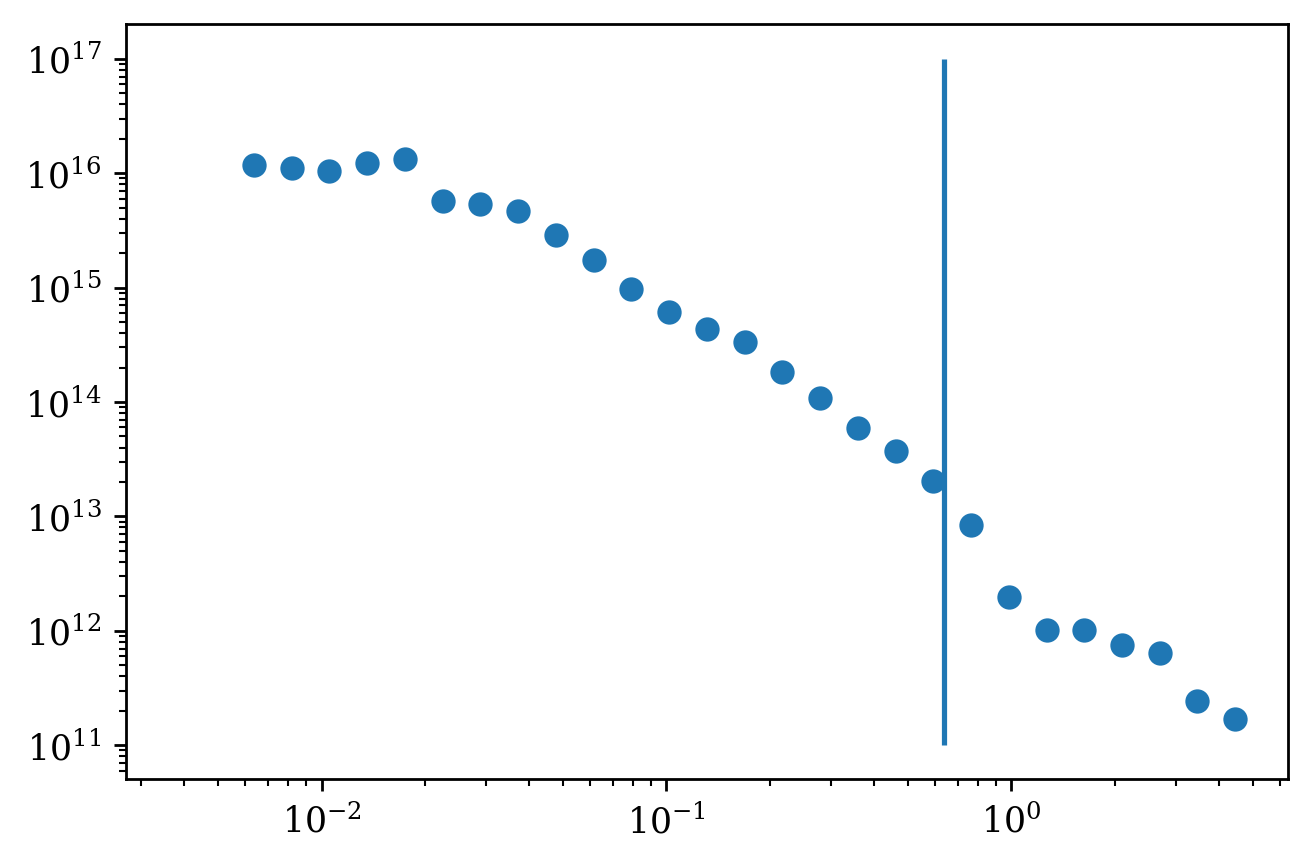

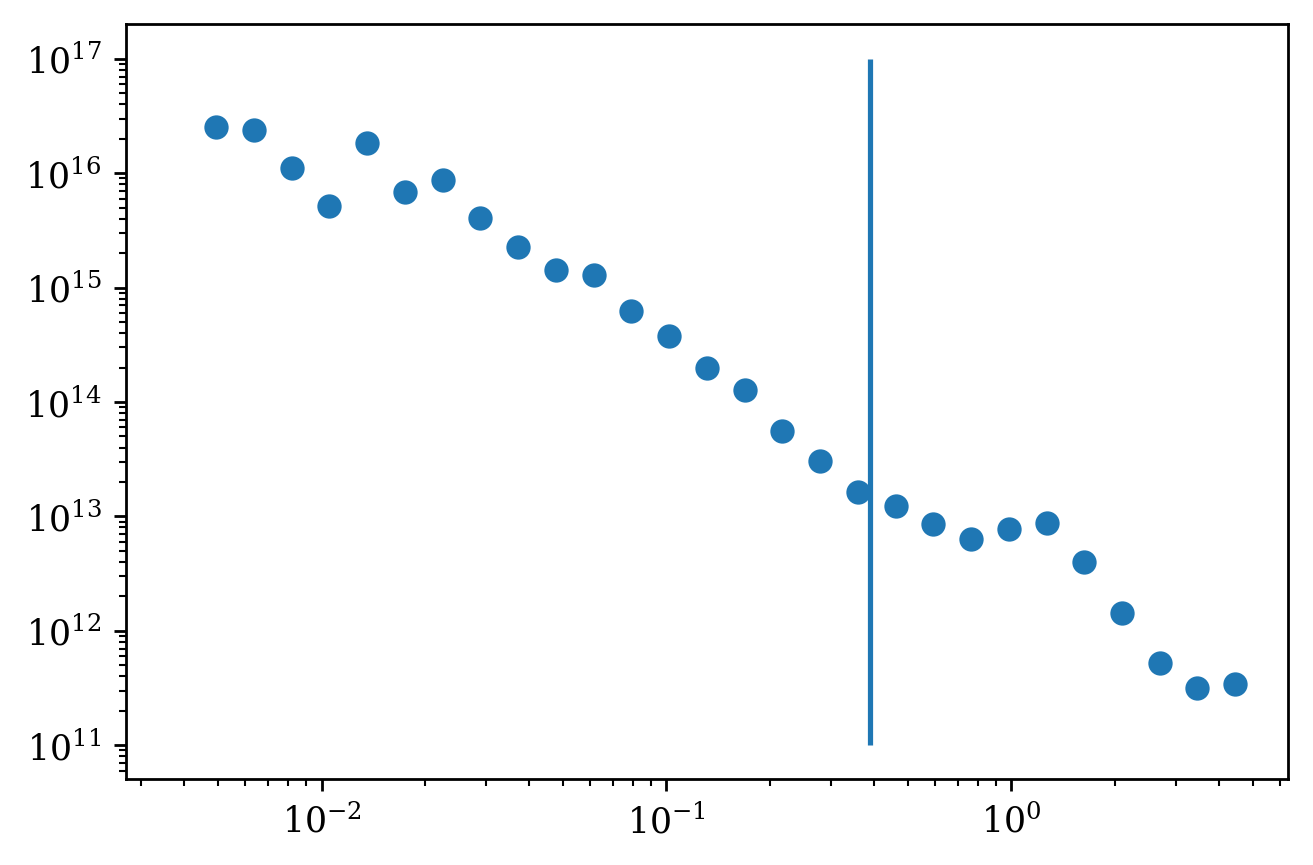

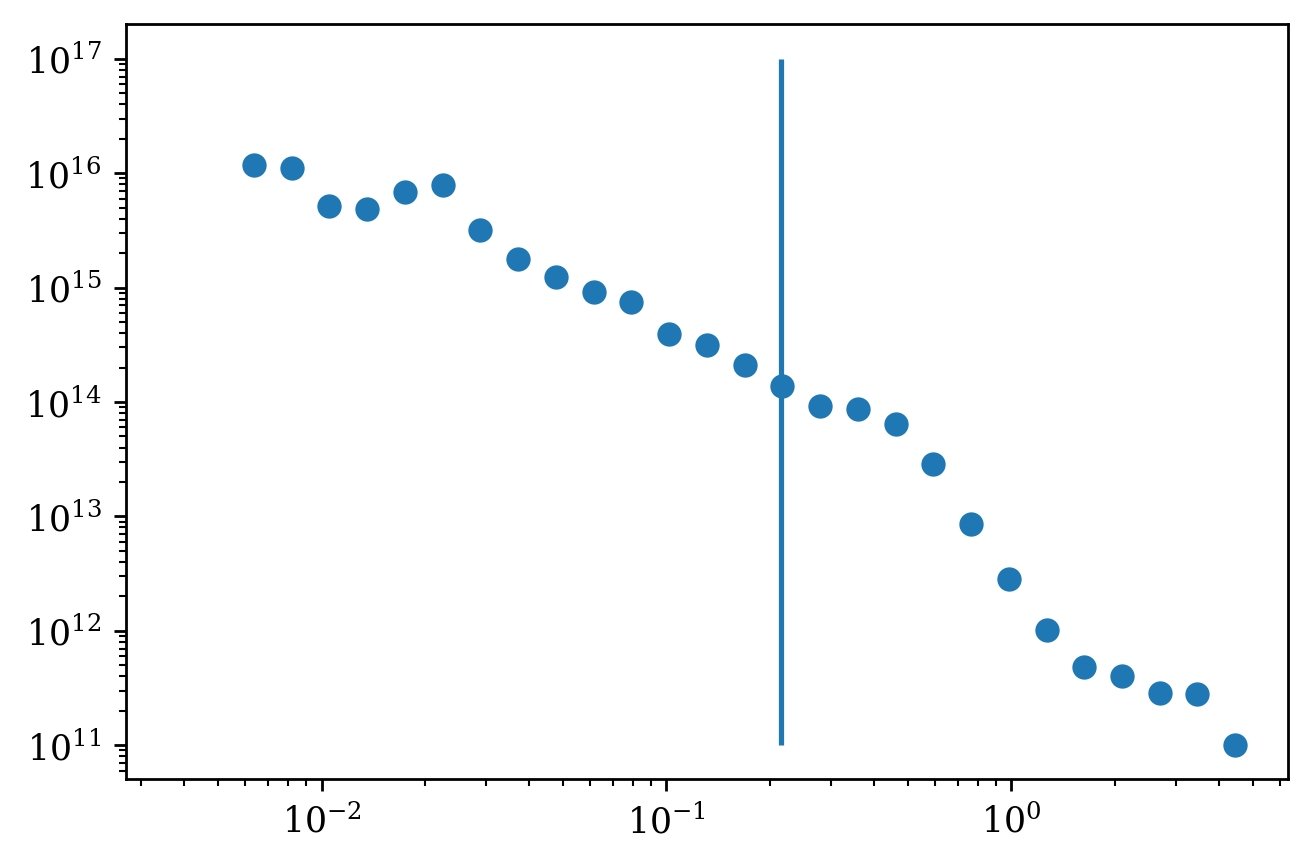

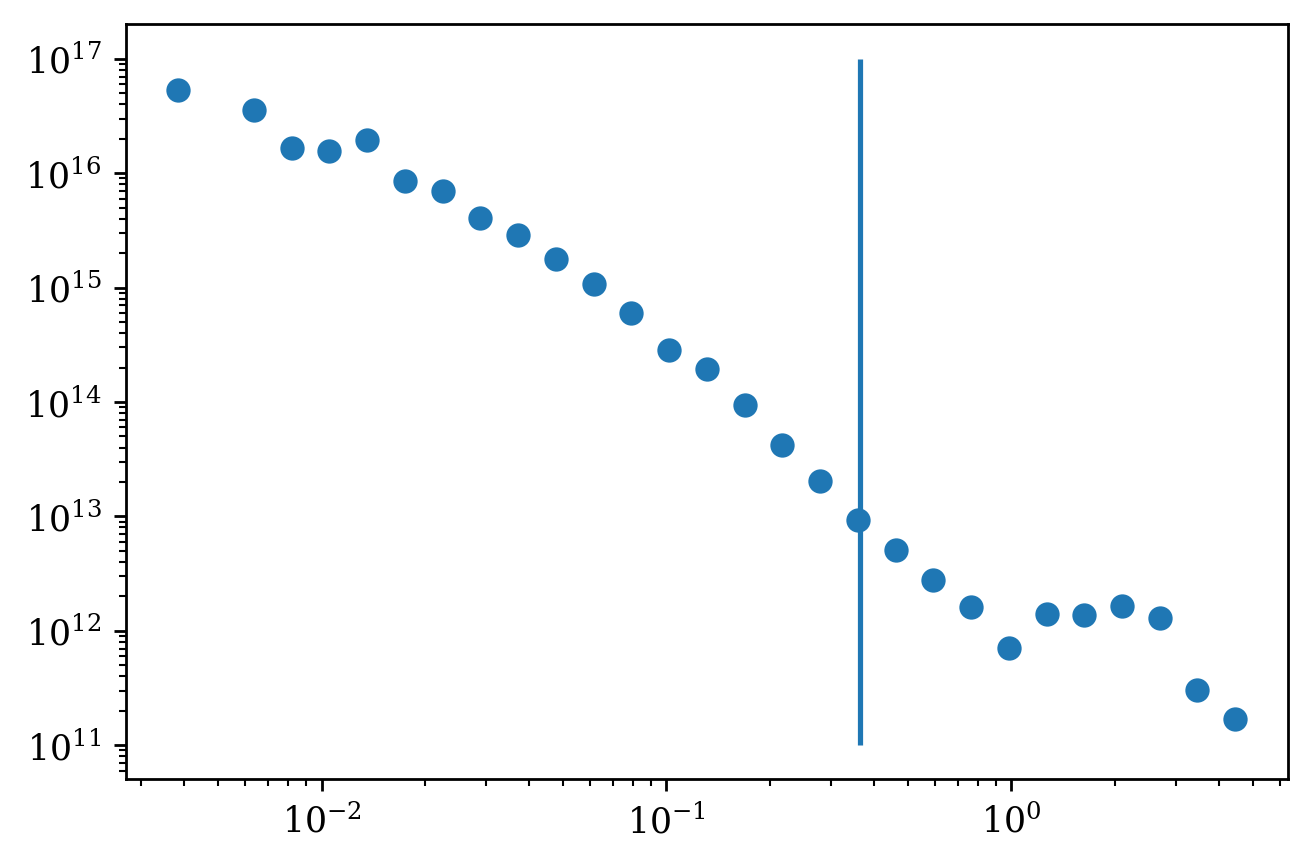

In [46]:
nbins = 30
te = np.load(folder+'/dprofiles_nbins{}.npy'.format(nbins), allow_pickle=True)
for i in range(10):
    plt.figure()
    halid = np.random.randint(len(te))
    mvir, rvir, rads, rho_d, hist = te[halid]
    plt.loglog(rads, rho_d, 'o')
    plt.vlines(rvir, 1e11, 1e17)

In [49]:
len(te)

44900